In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,classification_report

In [507]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [508]:
df.shape

(20640, 10)

In [509]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [510]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [511]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [513]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#Seggregating categorical and numerical features

In [514]:
categoricalfeatures =[features for features in df.columns if df[features].dtypes=='object']
categoricalfeatures

['ocean_proximity']

In [515]:
numericalfeatures=[features for features in df.columns if df[features].dtypes!='object']
numericalfeatures

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

#Checking for duplicates


In [516]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [517]:
for col in numericalfeatures:
  print(df[col].unique())

[-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.43 -120.42 -120.41 -120.3

In [518]:
for col in categoricalfeatures:
  print(df[col].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


##EDA


In [519]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='longitude', ylabel='Density'>

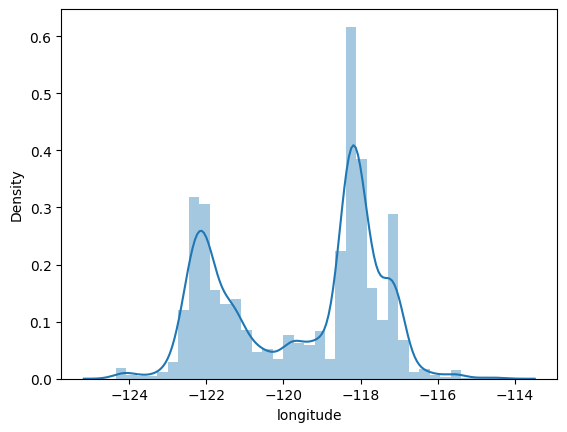

In [520]:
sns.distplot(df['longitude'])

(array([5.900e+01, 6.600e+01, 2.600e+01, 1.400e+01, 2.500e+01, 4.800e+01,
        3.700e+01, 1.310e+02, 3.120e+02, 1.025e+03, 1.295e+03, 1.312e+03,
        9.760e+02, 3.380e+02, 6.430e+02, 6.330e+02, 3.600e+02, 2.200e+02,
        2.110e+02, 2.490e+02, 1.110e+02, 1.550e+02, 3.790e+02, 3.180e+02,
        1.350e+02, 3.330e+02, 3.690e+02, 1.560e+02, 2.760e+02, 1.753e+03,
        2.507e+03, 1.718e+03, 1.035e+03, 5.490e+02, 3.990e+02, 1.090e+03,
        9.200e+02, 1.240e+02, 4.400e+01, 7.400e+01, 5.500e+01, 1.900e+01,
        1.300e+01, 7.000e+01, 2.600e+01, 1.000e+00, 3.000e+00, 1.000e+00,
        2.400e+01, 3.000e+00]),
 array([-124.35  , -124.1492, -123.9484, -123.7476, -123.5468, -123.346 ,
        -123.1452, -122.9444, -122.7436, -122.5428, -122.342 , -122.1412,
        -121.9404, -121.7396, -121.5388, -121.338 , -121.1372, -120.9364,
        -120.7356, -120.5348, -120.334 , -120.1332, -119.9324, -119.7316,
        -119.5308, -119.33  , -119.1292, -118.9284, -118.7276, -118.5268,
      

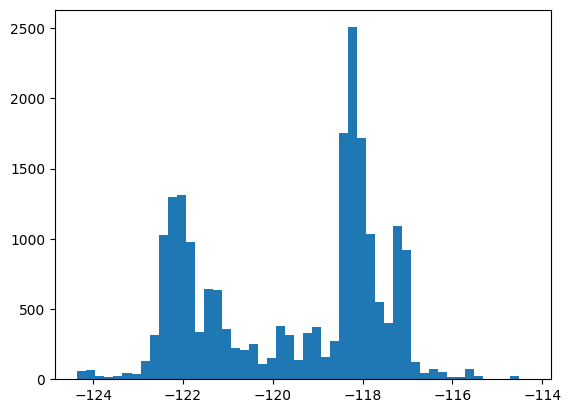

In [521]:
plt.hist(df['longitude'],bins=50)

<Axes: xlabel='latitude', ylabel='Density'>

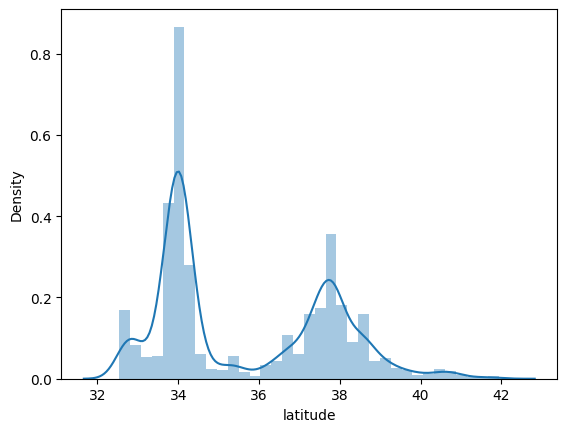

In [522]:
sns.distplot(df['latitude'])

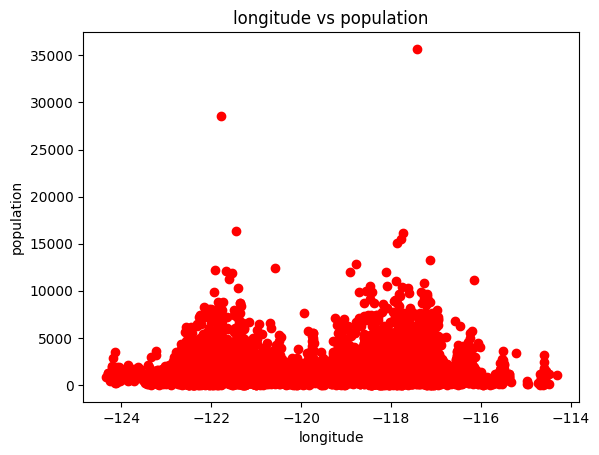

In [523]:
plt.scatter(df['longitude'],df['population'],color='red')
plt.xlabel('longitude')
plt.ylabel('population')
plt.title('longitude vs population')
plt.show()

(array([1796., 8987.,  747.,  474., 1292., 4712., 1740.,  490.,  324.,
          78.]),
 array([32.54 , 33.481, 34.422, 35.363, 36.304, 37.245, 38.186, 39.127,
        40.068, 41.009, 41.95 ]),
 <BarContainer object of 10 artists>)

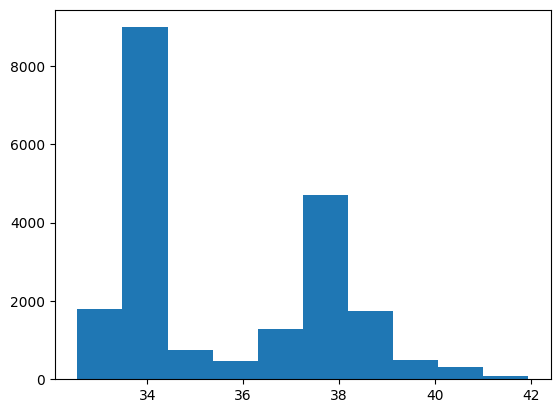

In [524]:
plt.hist(df['latitude'])

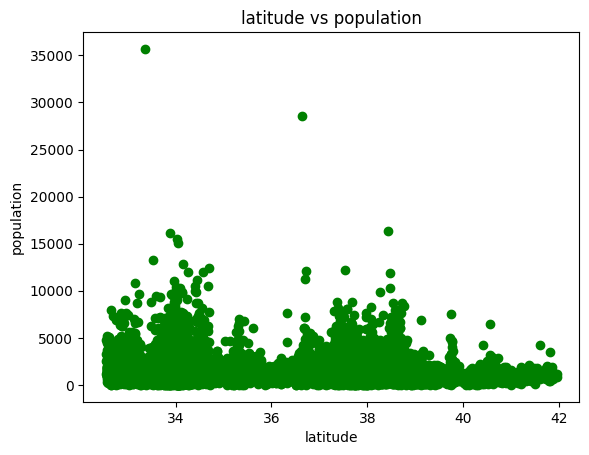

In [525]:
plt.scatter(df['latitude'],df['population'],color='green')
plt.xlabel('latitude')
plt.ylabel('population')
plt.title('latitude vs population')
plt.show()

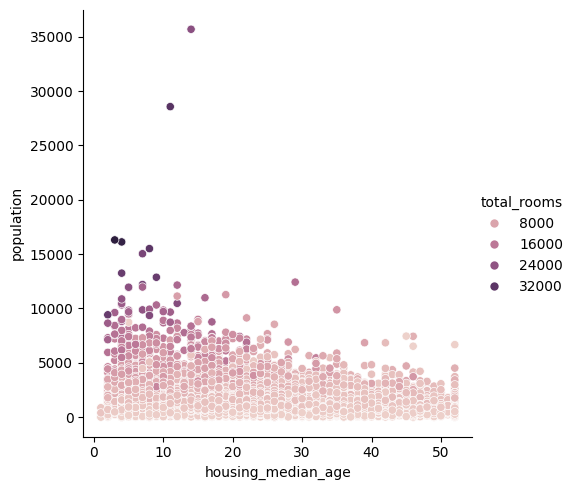

In [526]:
sns.relplot(x=df['housing_median_age'],y=df['population'],data=df,hue='total_rooms')

<Axes: xlabel='total_rooms'>

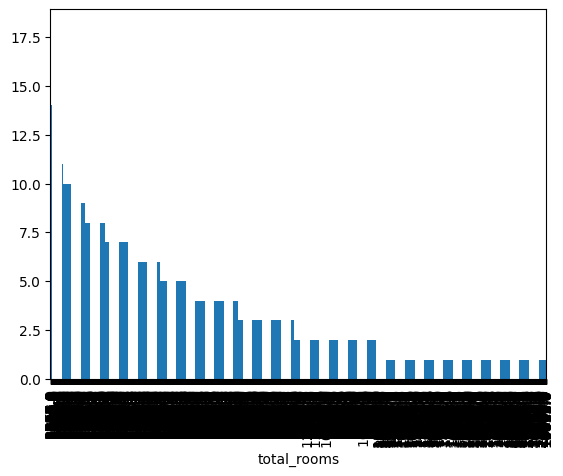

In [527]:
df['total_rooms'].value_counts().plot.bar()

<Axes: xlabel='total_rooms', ylabel='Density'>

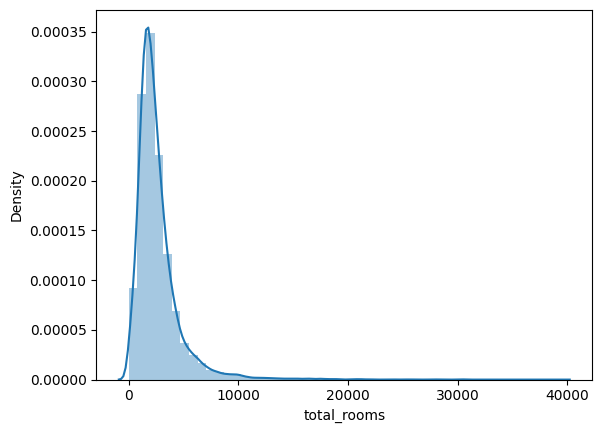

In [528]:
sns.distplot(df['total_rooms'])

<Axes: xlabel='total_bedrooms', ylabel='Density'>

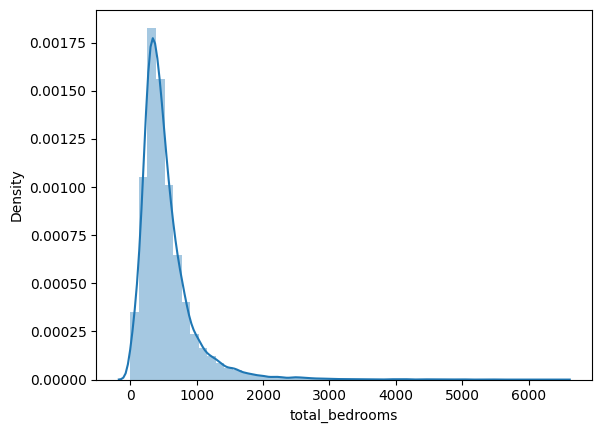

In [529]:
sns.distplot(df['total_bedrooms'])

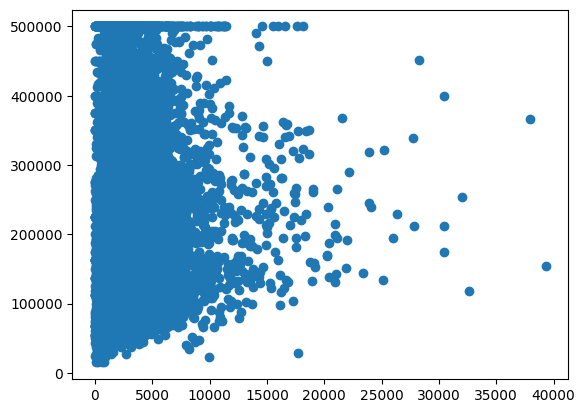

In [530]:
plt.scatter(df['total_rooms'],df['median_house_value'])

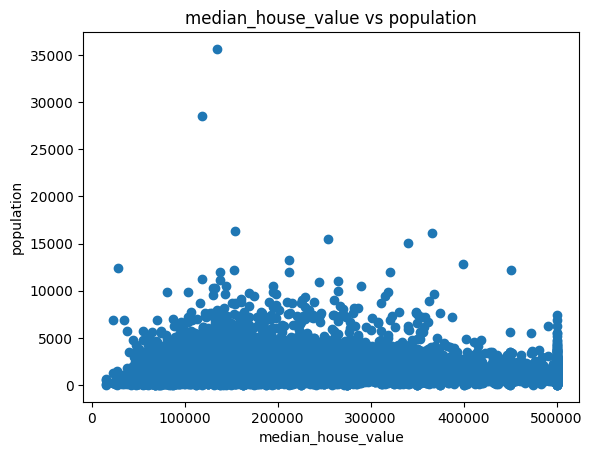

In [531]:
plt.scatter(df['median_house_value'],df['population'])
plt.xlabel('median_house_value')
plt.ylabel('population')
plt.title('median_house_value vs population')
plt.show()

<Axes: xlabel='median_house_value', ylabel='Density'>

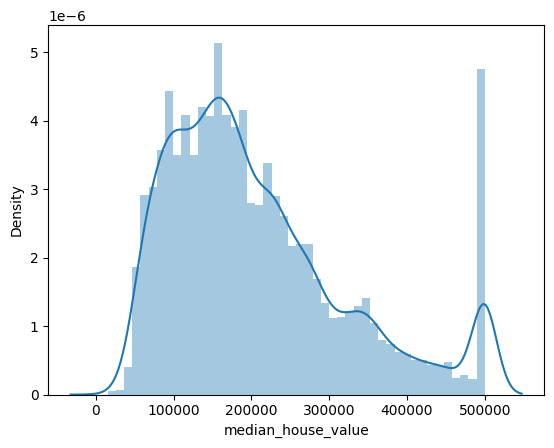

In [532]:
sns.distplot(df['median_house_value'])

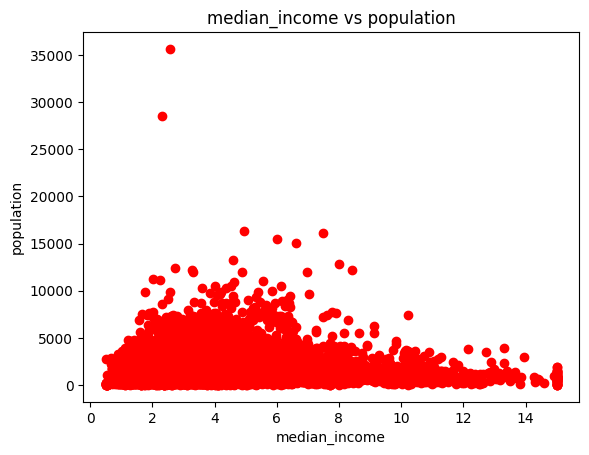

In [533]:
plt.scatter(df['median_income'],df['population'],color='red')
plt.xlabel('median_income')
plt.ylabel('population')
plt.title('median_income vs population')
plt.show()

<Axes: xlabel='median_income', ylabel='Density'>

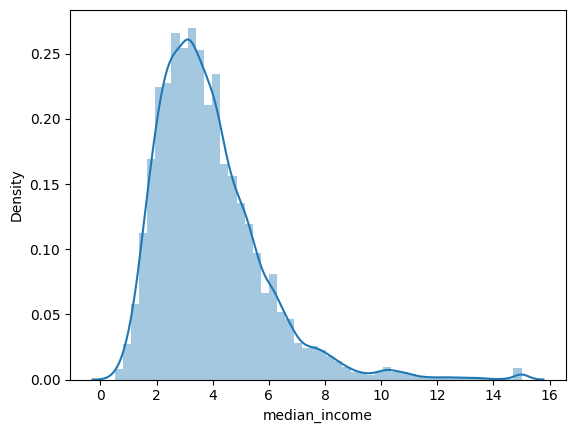

In [534]:
sns.distplot(df['median_income'])

<Axes: xlabel='population', ylabel='Density'>

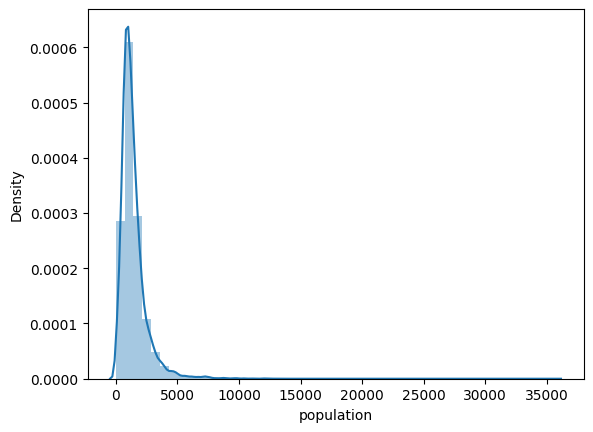

In [535]:
sns.distplot(df['population'])

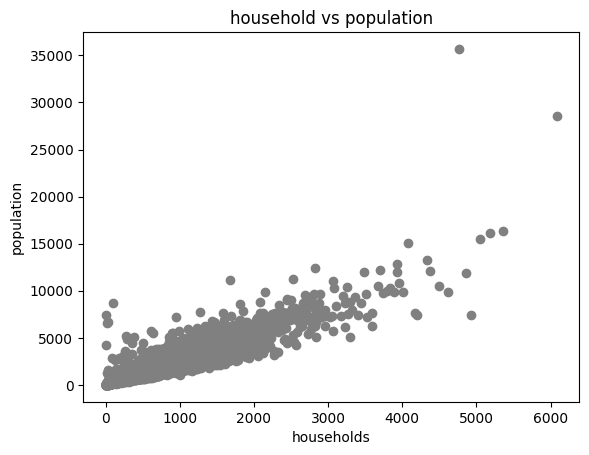

In [536]:
plt.scatter(df['households'],df['population'],color='grey')
plt.xlabel('households')
plt.ylabel('population')
plt.title('household vs population')
plt.show()

<Axes: xlabel='households', ylabel='Density'>

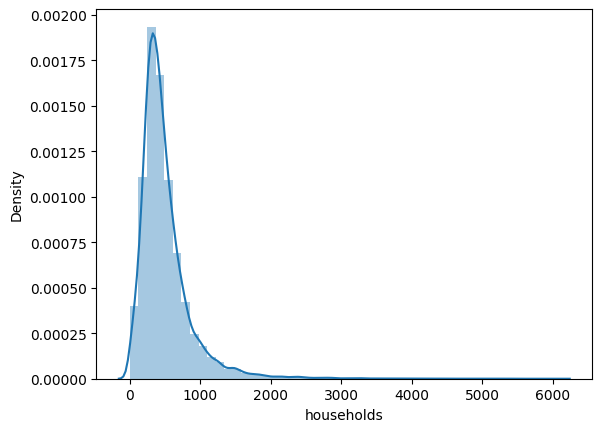

In [537]:
sns.distplot(df['households'])

<Axes: xlabel='ocean_proximity'>

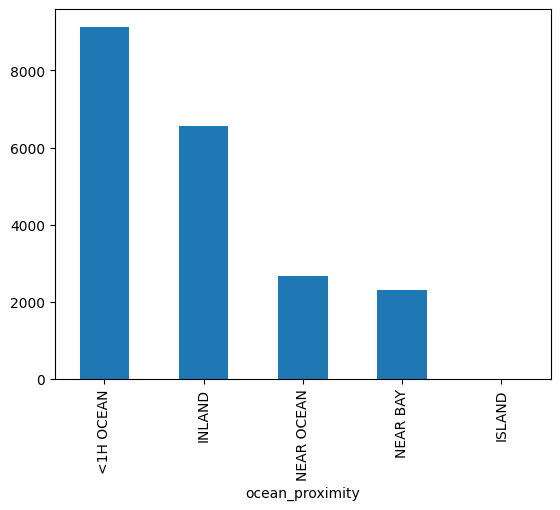

In [538]:
df['ocean_proximity'].value_counts().plot.bar()

#Outlier Treatment

In [539]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: ylabel='total_rooms'>

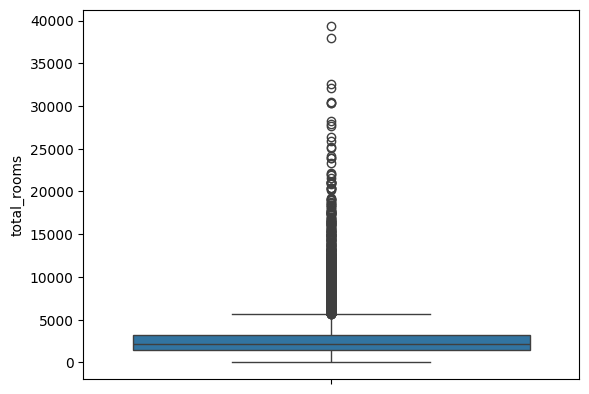

In [540]:
sns.boxplot(df['total_rooms'])

<Axes: xlabel='total_rooms', ylabel='Density'>

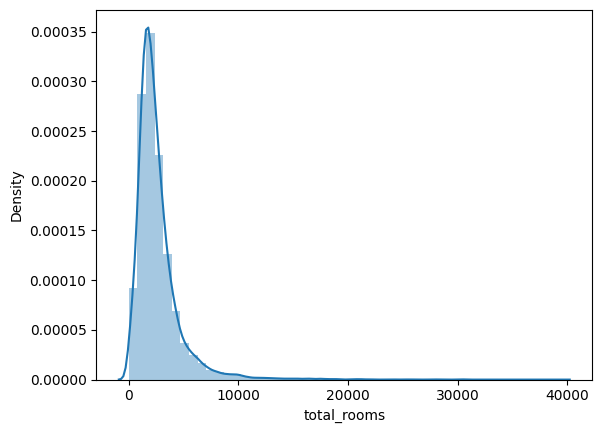

In [541]:
sns.distplot(df['total_rooms'])

In [542]:
df['total_rooms_log']=np.log1p(df['total_rooms'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.781058
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867850
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.291656
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.150701
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.395108


(array([2.000e+00, 1.000e+01, 5.000e+01, 1.100e+02, 2.910e+02, 1.377e+03,
        9.511e+03, 8.108e+03, 1.089e+03, 9.200e+01]),
 array([ 1.09861229,  2.04670246,  2.99479263,  3.9428828 ,  4.89097298,
         5.83906315,  6.78715332,  7.73524349,  8.68333366,  9.63142383,
        10.57951401]),
 <BarContainer object of 10 artists>)

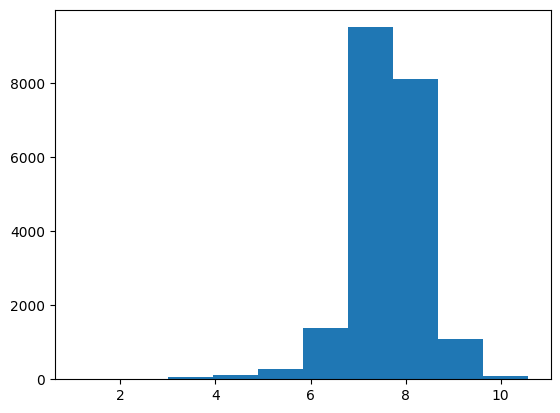

In [543]:
plt.hist(df['total_rooms_log'])

<Axes: xlabel='total_rooms_log', ylabel='Density'>

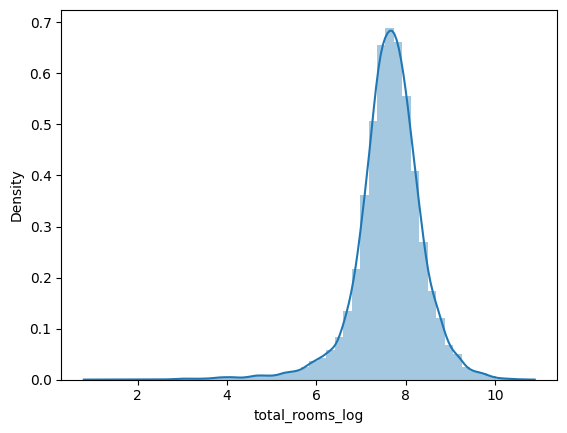

In [544]:
sns.distplot(df['total_rooms_log'])

In [545]:
IQR=df['total_rooms_log'].quantile(0.75)-df['total_rooms_log'].quantile(0.25)
IQR

0.7763838711240973

In [546]:
Q3=df['total_rooms_log'].quantile(0.75)
Q1=df['total_rooms_log'].quantile(0.25)
print(Q3,Q1)

8.054840221101024 7.278456349976927


In [547]:
upperfence=Q3+(3*IQR)
lowerfence=Q1-(3*IQR)
print(upperfence,lowerfence)

10.383991834473317 4.949304736604635


In [548]:
df.loc[df['total_rooms_log']>=10.38,'total_rooms_log']=10.38
df.loc[df['total_rooms_log']<=4.94,'total_rooms_log']=4.94

In [549]:
df[df['total_rooms_log']>10.38]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log


<Axes: ylabel='total_rooms_log'>

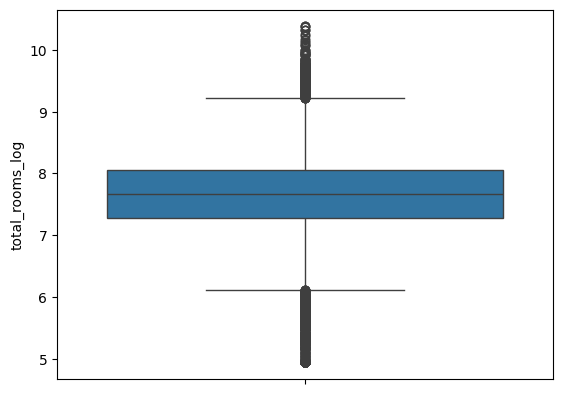

In [550]:
sns.boxplot(df['total_rooms_log'])

(array([ 304.,  300.,  656., 2388., 6627., 6674., 2695.,  772.,  185.,
          39.]),
 array([ 4.94 ,  5.484,  6.028,  6.572,  7.116,  7.66 ,  8.204,  8.748,
         9.292,  9.836, 10.38 ]),
 <BarContainer object of 10 artists>)

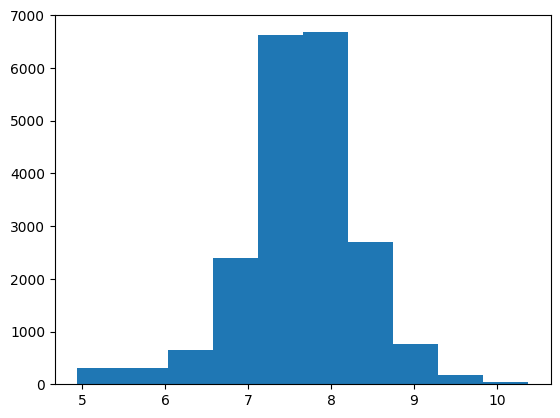

In [551]:
plt.hist(df['total_rooms_log'])

#Total bedrooms outlier cleaning



<Axes: ylabel='total_bedrooms'>

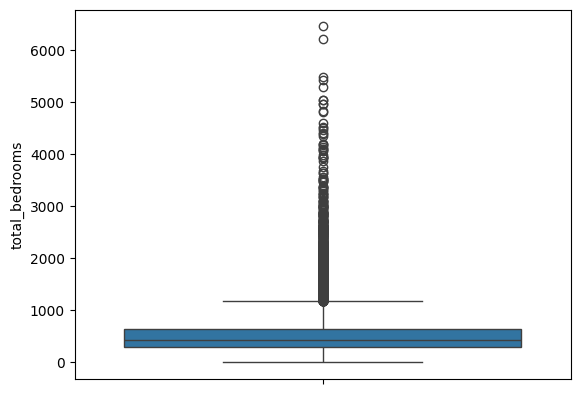

In [552]:
sns.boxplot(df['total_bedrooms'])

<Axes: xlabel='total_bedrooms', ylabel='Density'>

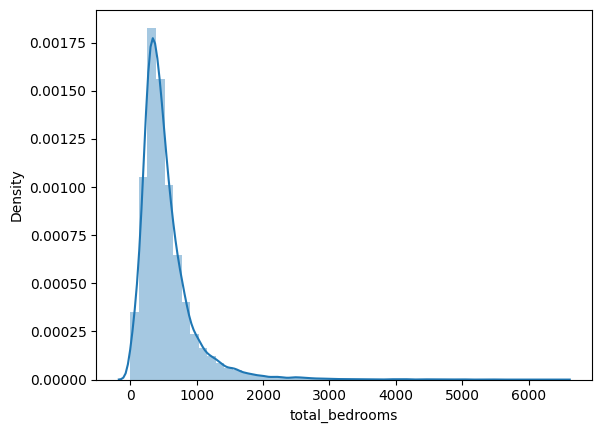

In [553]:
sns.distplot(df['total_bedrooms'])

In [554]:
IQR=df['total_bedrooms'].quantile(0.75)-df['total_bedrooms'].quantile(0.25)
IQR

351.0

In [555]:
upperfence=df['total_bedrooms'].quantile(0.75) + (3*IQR)
lowerfence=df['total_bedrooms'].quantile(0.25) - (3*IQR)
print(upperfence,lowerfence)

1700.0 -757.0


In [556]:
df.loc[df['total_bedrooms']>=1700,'total_bedrooms']=1700

In [557]:
df[df['total_bedrooms']>1700]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log


<Axes: xlabel='total_bedrooms', ylabel='Count'>

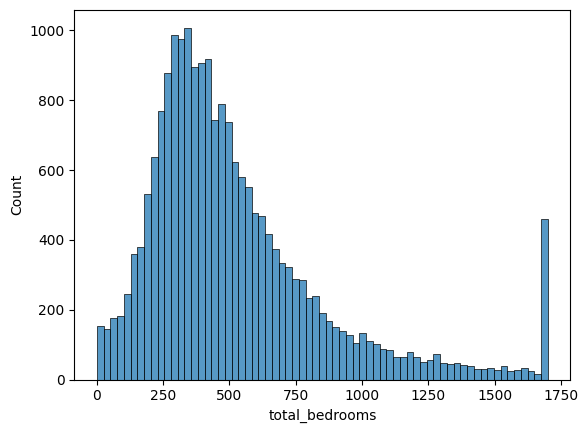

In [558]:
sns.histplot(df['total_bedrooms'])

In [559]:
df['total_bedrooms'].max()

1700.0

In [560]:
df['total_bedrooms_log']=np.log1p(df['total_bedrooms'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,total_bedrooms_log
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.781058,4.867534
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867850,7.009409
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.291656,5.252273
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.150701,5.463832
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.395108,5.638355
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,7.418181,5.926926
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.548219,5.017280
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,7.720905,6.186209
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,7.528869,6.016157


<Axes: xlabel='total_bedrooms_log', ylabel='Density'>

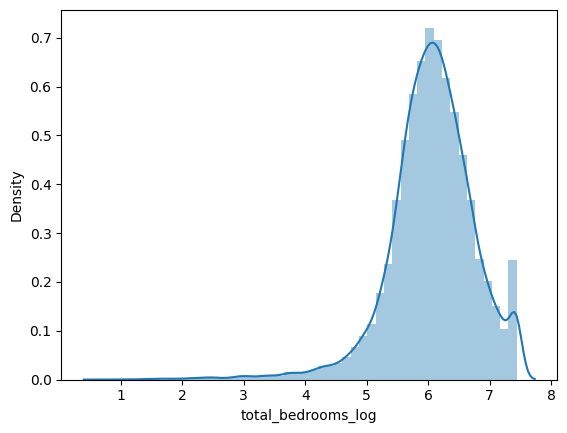

In [561]:
sns.distplot(df['total_bedrooms_log'])

<Axes: ylabel='total_bedrooms_log'>

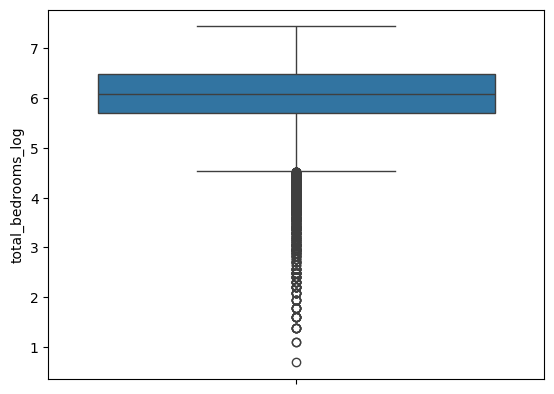

In [562]:
sns.boxplot(df['total_bedrooms_log'])

<Axes: xlabel='total_bedrooms_log', ylabel='Count'>

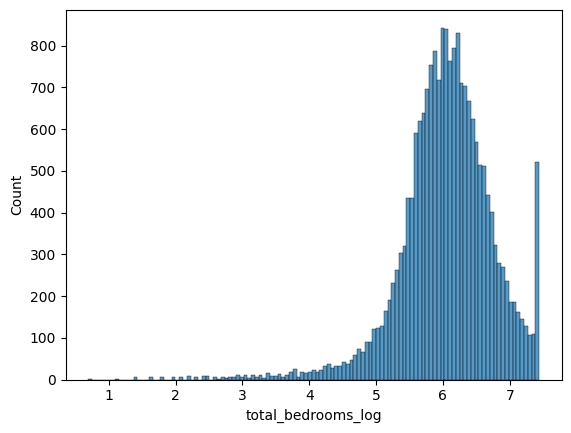

In [563]:
sns.histplot(df['total_bedrooms_log'])

In [564]:
upperfence=df['total_bedrooms_log'].mean() +3* df['total_bedrooms_log'].std()
lowerfence=df['total_bedrooms_log']-3* df['total_bedrooms_log'].std()
print(upperfence,lowerfence)

8.181654907356782 0        2.733871
1        4.875745
2        3.118610
3        3.330168
4        3.504691
           ...   
20635    3.793262
20636    2.883616
20637    4.052545
20638    3.882493
20639    4.291205
Name: total_bedrooms_log, Length: 20640, dtype: float64


In [565]:
df.loc[df['total_bedrooms_log']>=8.18,'total_bedrooms_log']=8.18
df.loc[df['total_bedrooms_log']<=2.73,'total_bedrooms_log']=2.73

<Axes: xlabel='total_bedrooms_log', ylabel='Count'>

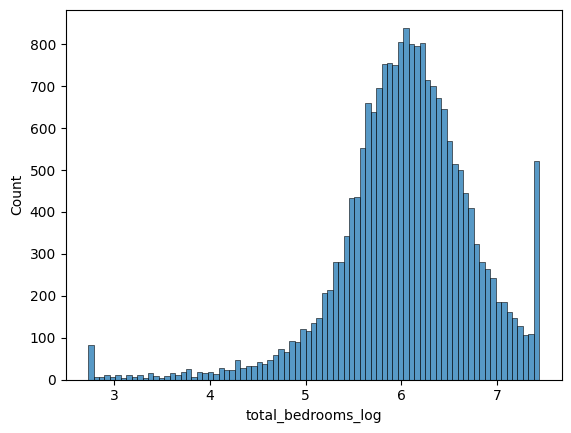

In [566]:
sns.histplot(df['total_bedrooms_log'])

#Population outlier treatment



<Axes: xlabel='population', ylabel='Density'>

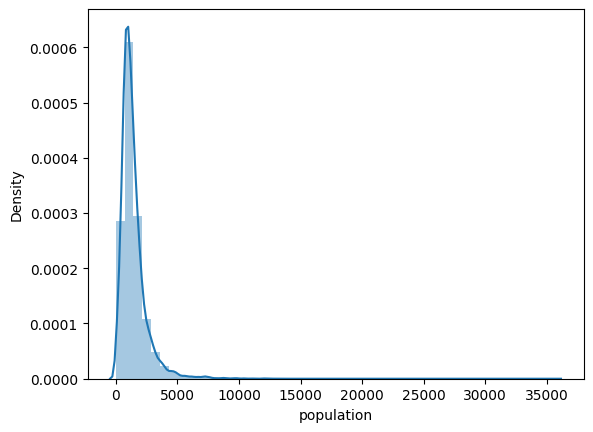

In [567]:
sns.distplot(df['population'])

<Axes: ylabel='population'>

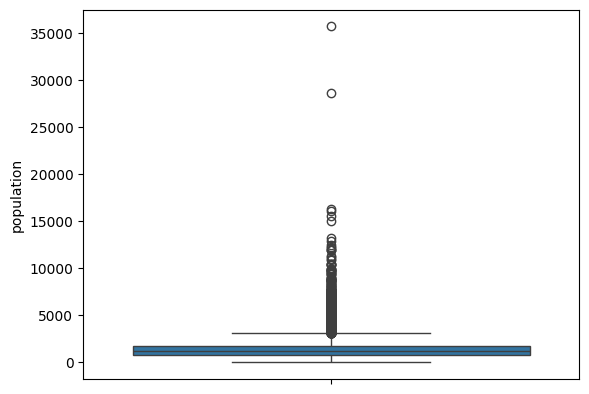

In [568]:
sns.boxplot(df['population'])

<Axes: xlabel='population', ylabel='Count'>

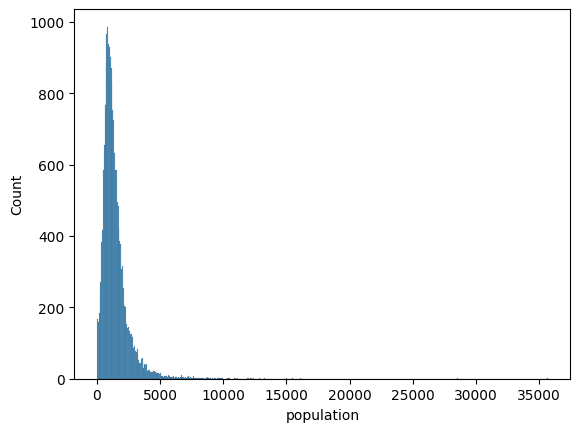

In [569]:
sns.histplot(df['population'])

In [570]:
IQR=df['population'].quantile(0.75)-df['population'].quantile(0.25)
IQR

938.0

In [571]:
upperfence=df['population'].quantile(0.75) + (3*IQR)
lowerfence=df['population'].quantile(0.25) - (3*IQR)
print(upperfence,lowerfence)

4539.0 -2027.0


In [572]:
df.loc[df['population']>=4539.0,'population']=4539.0

In [573]:
df[df['population']>4539.0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,total_bedrooms_log


<Axes: xlabel='population', ylabel='Count'>

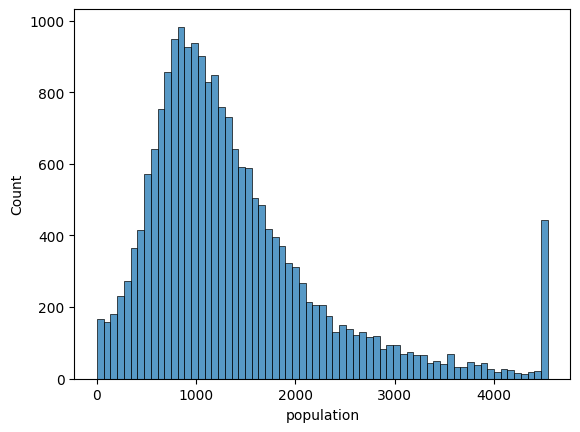

In [574]:
sns.histplot(df['population'])

In [575]:
df['population'].max()

4539.0

In [576]:
df['population_log']=np.log1p(df['population'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,total_bedrooms_log,population_log
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.781058,4.867534,5.777652
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867850,7.009409,7.784057
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.291656,5.252273,6.208590
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.150701,5.463832,6.326149
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.395108,5.638355,6.338594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,7.418181,5.926926,6.740519
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.548219,5.017280,5.877736
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,7.720905,6.186209,6.915723
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,7.528869,6.016157,6.609349


<Axes: xlabel='population_log', ylabel='Density'>

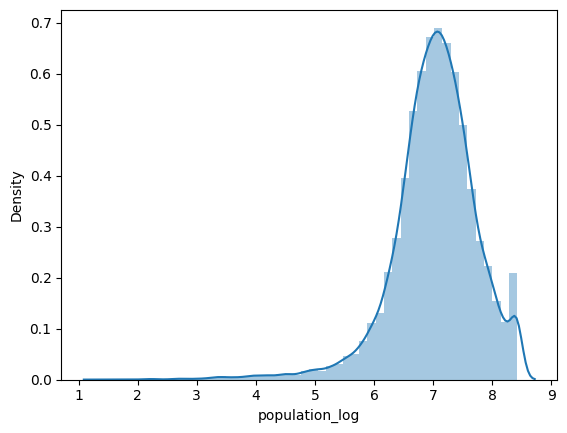

In [577]:
sns.distplot(df['population_log'])

<Axes: xlabel='population_log', ylabel='Count'>

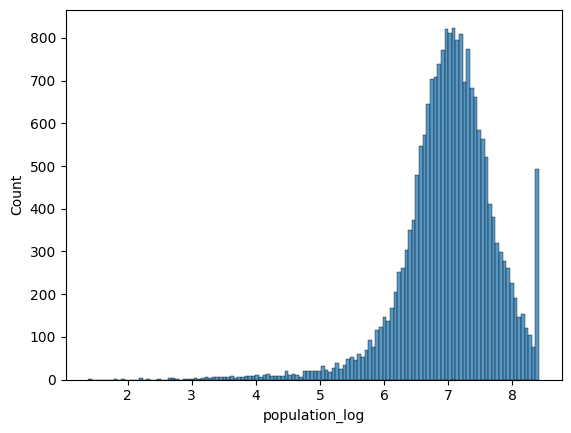

In [578]:
sns.histplot(df['population_log'])

In [579]:
upperfence=df['population_log'].mean() + 3*df['population_log'].std()
lowerfence=df['population_log'].mean() - 3*df['population_log'].std()
print(upperfence,lowerfence)

9.184424618329937 4.854005640940624


In [580]:
df.loc[df['population_log']>=9.18,'population_log']=9.18
df.loc[df['population_log']<=4.85,'population_log']=4.85

<Axes: xlabel='population_log', ylabel='Count'>

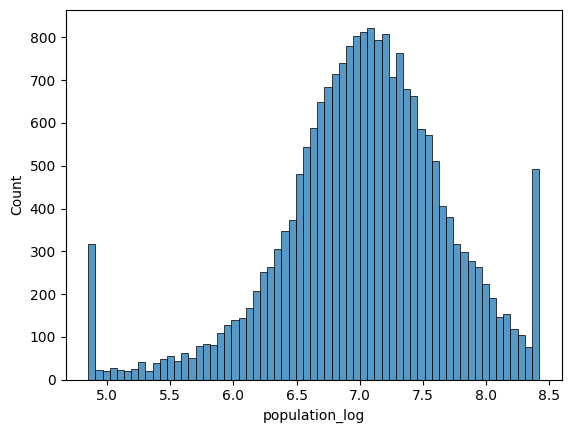

In [581]:
sns.histplot(df['population_log'])

#Households Outlier treatment


<Axes: xlabel='households', ylabel='Density'>

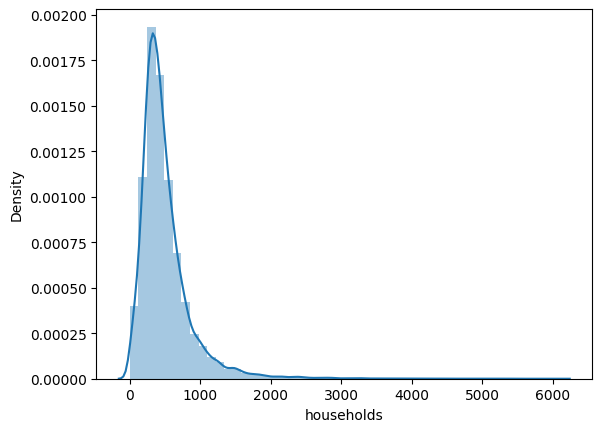

In [582]:
sns.distplot(df['households'])

<Axes: ylabel='households'>

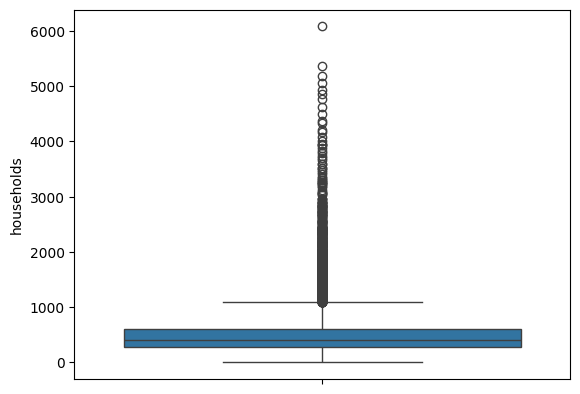

In [583]:
sns.boxplot(df['households'])

<Axes: xlabel='households', ylabel='Count'>

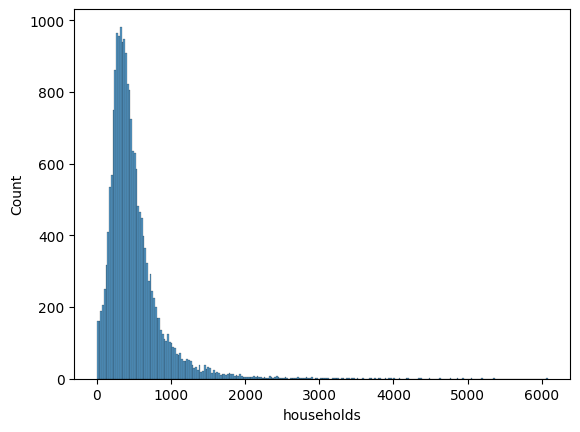

In [584]:
sns.histplot(df['households'])

In [585]:
IQR=df['households'].quantile(0.75)-df['households'].quantile(0.25)
IQR

325.0

In [586]:
upperfence=df['households'].quantile(0.75)+(3*IQR)
lowerfence=df['households'].quantile(0.25)-(3*IQR)
print(upperfence,lowerfence)

1580.0 -695.0


In [587]:
df.loc[df['households']>=1580.0,'households']=1580.0
df.loc[df['households']<=-695.0,'households']=-695.0

In [588]:
df[df['households']>1580.0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,total_bedrooms_log,population_log


<Axes: xlabel='households', ylabel='Count'>

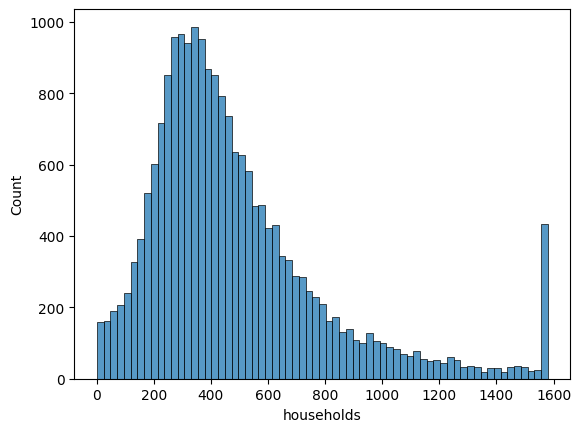

In [589]:
sns.histplot(df['households'])

In [590]:
df['households_log']=np.log1p(df['households'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,total_bedrooms_log,population_log,households_log
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.781058,4.867534,5.777652,4.844187
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867850,7.009409,7.784057,7.037906
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.291656,5.252273,6.208590,5.181784
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.150701,5.463832,6.326149,5.393628
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.395108,5.638355,6.338594,5.560682


<Axes: ylabel='households_log'>

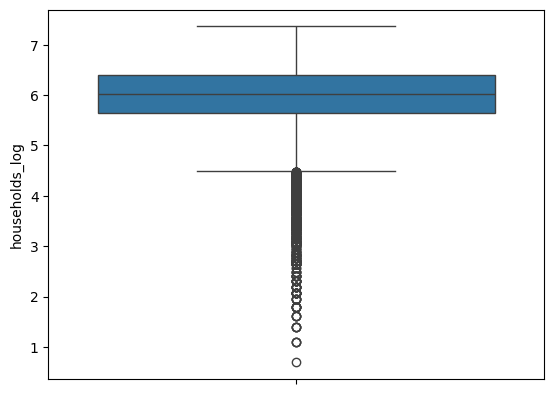

In [591]:
sns.boxplot(df['households_log'])

<Axes: xlabel='households_log', ylabel='Density'>

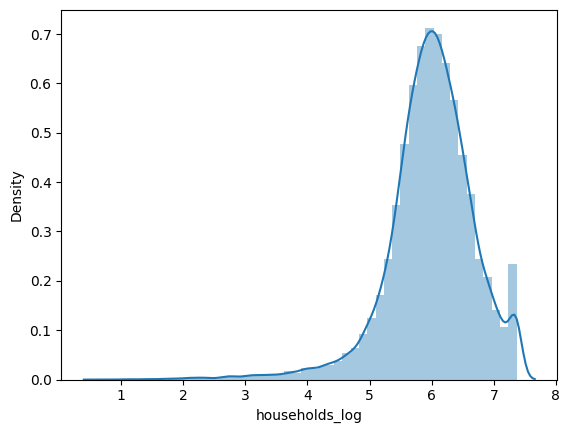

In [592]:
sns.distplot(df['households_log'])

<Axes: xlabel='households_log', ylabel='Count'>

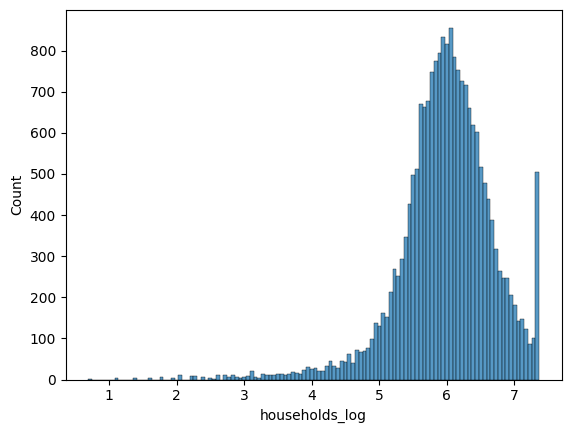

In [593]:
sns.histplot(df['households_log'])

In [594]:
upperfence=df['households_log'].mean() + 3*df['households_log'].std()
lowerfence=df['households_log'].mean() - 3*df['households_log'].std()
print(upperfence,lowerfence)

8.11662912814734 3.840543827128456


In [595]:
df.loc[df['households_log']>=8.11,'households_log']=8.11
df.loc[df['households_log']<=3.84,'households_log']=3.84

In [596]:
df[df['households_log']>8.11]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,total_bedrooms_log,population_log,households_log


In [597]:
df[df['households_log']<3.84]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,total_bedrooms_log,population_log,households_log


<Axes: xlabel='households_log', ylabel='Count'>

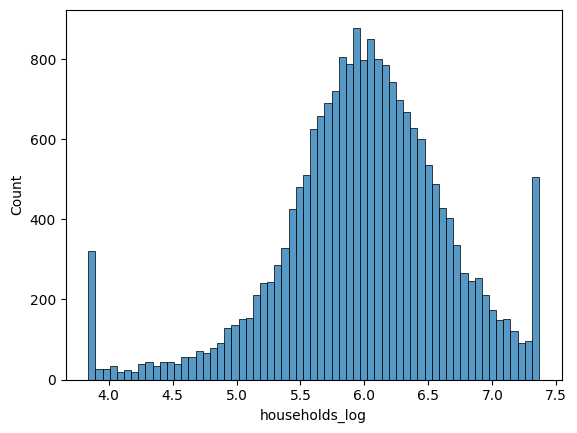

In [598]:
sns.histplot(df['households_log'])

#Median_income outlers

<Axes: ylabel='median_income'>

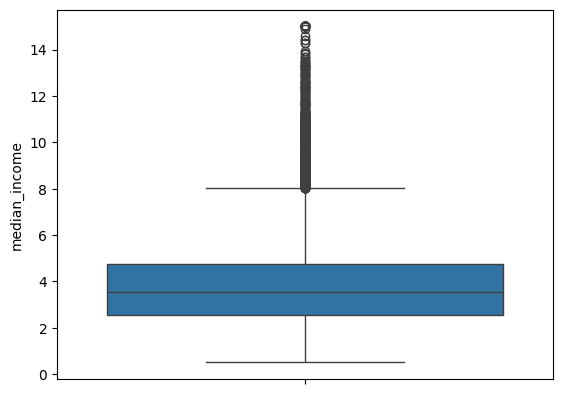

In [599]:
sns.boxplot(df['median_income'])

<Axes: xlabel='median_income', ylabel='Count'>

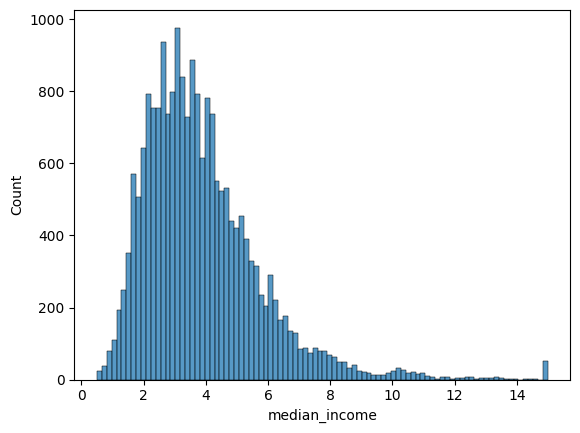

In [600]:
sns.histplot(df['median_income'])

<Axes: xlabel='median_income', ylabel='Density'>

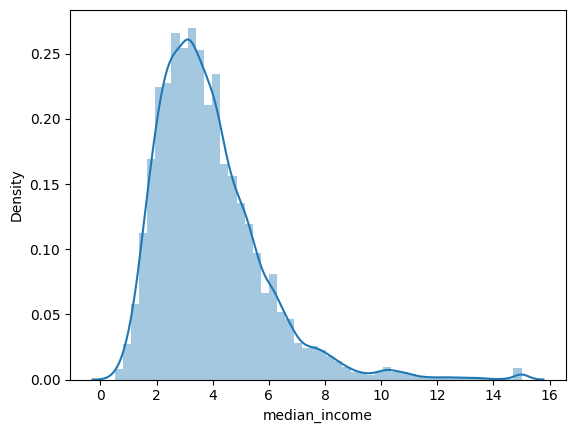

In [601]:
sns.distplot(df['median_income'])

In [602]:
IQR=df['median_income'].quantile(0.75)-df['median_income'].quantile(0.25)
IQR

2.17985

In [603]:
upperfence=df['median_income'].quantile(0.75)+(3*IQR)
lowerfence=df['median_income'].quantile(0.25)-(3*IQR)
print(upperfence,lowerfence)

11.2828 -3.9761500000000005


In [604]:
df.loc[df['median_income']>=11.282,'median_income']=11.282

<Axes: xlabel='median_income', ylabel='Count'>

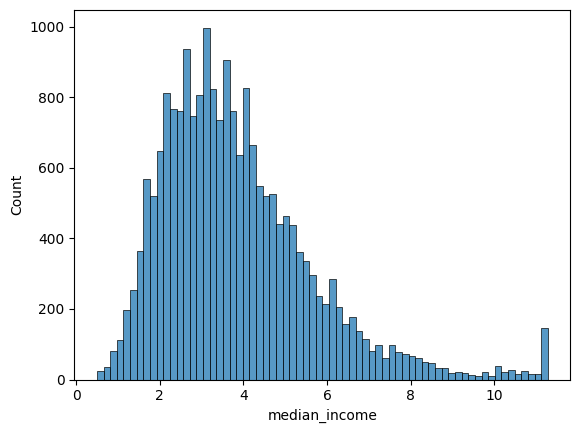

In [605]:
sns.histplot(df['median_income'])

In [606]:
df['median_income_log']=np.log1p(df['median_income'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.781058,4.867534,5.777652,4.844187,2.232720
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867850,7.009409,7.784057,7.037906,2.230165
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.291656,5.252273,6.208590,5.181784,2.111110
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.150701,5.463832,6.326149,5.393628,1.893579
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.395108,5.638355,6.338594,5.560682,1.578195


<Axes: xlabel='median_income_log', ylabel='Density'>

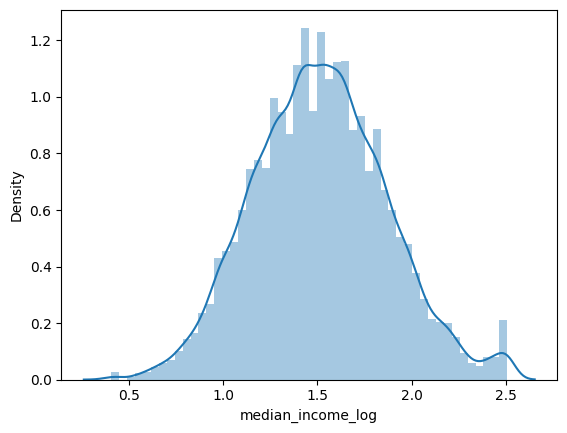

In [607]:
sns.distplot(df['median_income_log'])

<Axes: ylabel='median_income_log'>

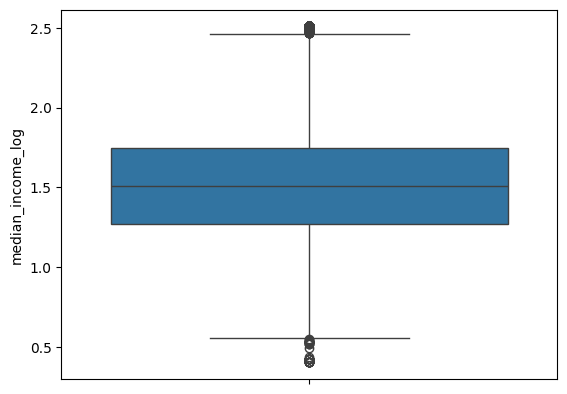

In [608]:
sns.boxplot(df['median_income_log'])

In [609]:
upperfence=df['median_income_log'].mean()+3*df['median_income_log'].std()
lowerfence=df['median_income_log'].mean()-3*df['median_income_log'].std()
print(upperfence,lowerfence)

2.581973679696871 0.4498571117460932


In [610]:
df.loc[df['median_income_log']>=2.58,'median_income_log']=2.58
df.loc[df['median_income_log']<=0.44,'median_income_log']=0.44

<Axes: xlabel='median_income_log', ylabel='Count'>

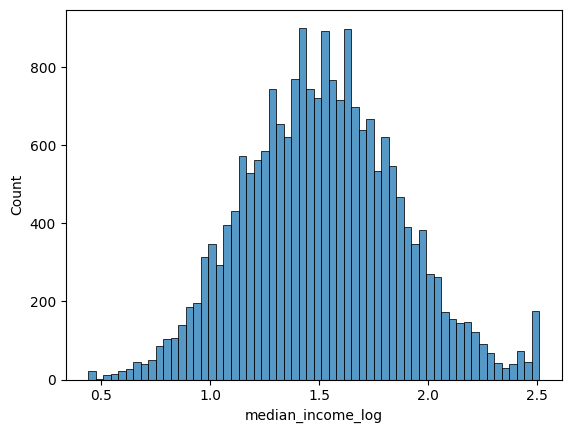

In [611]:
sns.histplot(df['median_income_log'])

#median house value



<Axes: xlabel='median_house_value', ylabel='Density'>

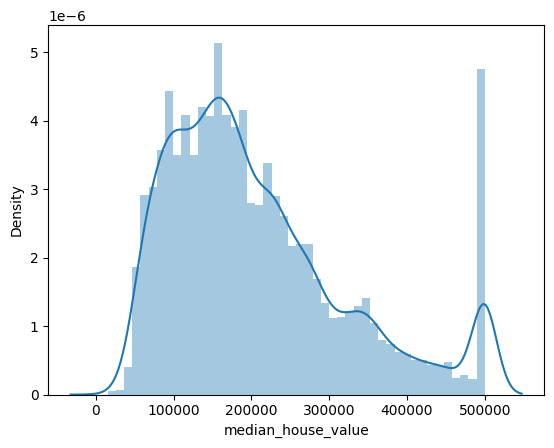

In [612]:
sns.distplot(df['median_house_value'])

<Axes: xlabel='median_house_value', ylabel='Count'>

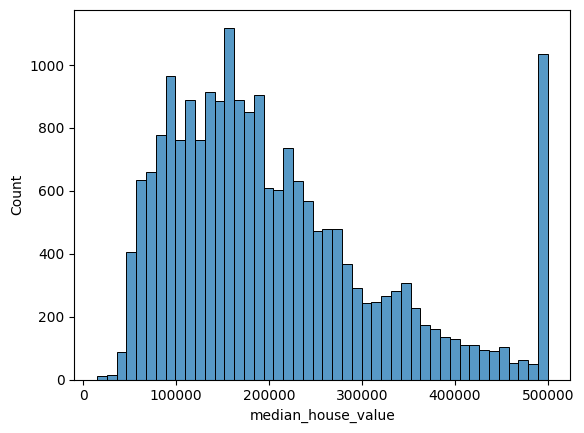

In [613]:
sns.histplot(df['median_house_value'])

<Axes: ylabel='median_house_value'>

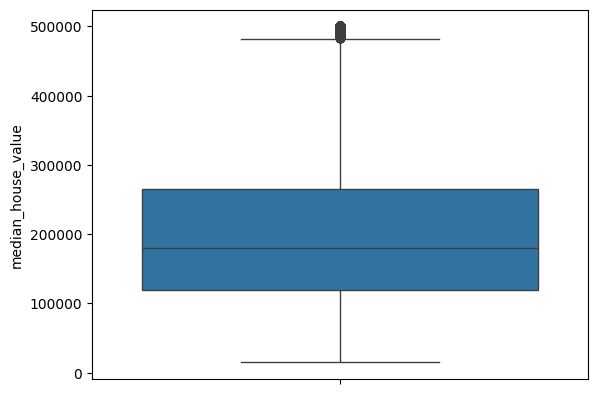

In [614]:
sns.boxplot(df['median_house_value'])

In [615]:
upperfence=df['median_house_value'].mean()+ 3*df['median_house_value'].std()
lowerfence=df['median_house_value'].mean()- 3*df['median_house_value'].std()
print(upperfence,lowerfence)

553042.6645321563 -139331.03071432686


In [616]:
df.loc[df['median_house_value']>=553042.66,'median_house_value']=553042.66

In [617]:
df[df['median_house_value']>553042.66]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log


<Axes: xlabel='median_house_value', ylabel='Count'>

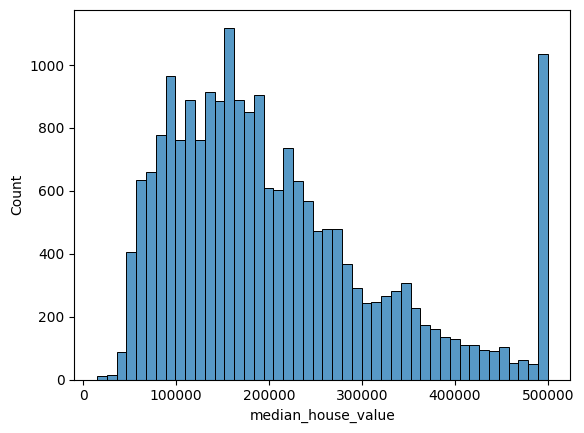

In [618]:
sns.histplot(df['median_house_value'])

In [619]:
df['median_house_value'].max()

500001.0

In [620]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'total_rooms_log',
       'total_bedrooms_log', 'population_log', 'households_log',
       'median_income_log'],
      dtype='object')

#Missing value treatment

In [621]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
total_rooms_log         0
total_bedrooms_log    207
population_log          0
households_log          0
median_income_log       0
dtype: int64

In [622]:
median=df['total_bedrooms_log'].median()
median

6.077642243349034

In [623]:
df['total_bedrooms_log']=df['total_bedrooms_log'].fillna(median)

In [624]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
total_rooms_log         0
total_bedrooms_log      0
population_log          0
households_log          0
median_income_log       0
dtype: int64

#Data Encoding


In [627]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [629]:
ohe=OneHotEncoder()
op=ohe.fit_transform(df[['ocean_proximity']]).toarray()
op

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [630]:
df['ocean_proximity']=op

#Train test split



In [633]:
X=df[['longitude','latitude','housing_median_age','total_rooms_log','total_bedrooms_log','population_log','households_log','median_income_log','ocean_proximity']]
Y=df['median_house_value']

In [635]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [636]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log,ocean_proximity
8287,-118.15,33.77,41.0,8.145840,6.799056,7.391415,6.732211,1.704748,0.0
4382,-118.26,34.09,36.0,8.161660,6.726233,7.883446,6.670766,1.577906,1.0
6104,-117.89,34.12,35.0,7.277939,5.609472,7.110696,5.594711,1.608117,1.0
11091,-117.89,33.82,18.0,8.070281,6.697034,7.546974,6.588926,1.542464,1.0
13440,-117.42,34.08,28.0,7.741099,6.040255,7.180070,6.098074,1.500605,0.0


In [637]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log,ocean_proximity
14330,-117.14,32.73,26.0,6.111467,4.890349,5.762051,4.700480,1.609438,0.0
6732,-118.10,34.13,44.0,7.465083,5.472271,6.542472,5.517453,2.378731,1.0
10592,-117.78,33.69,16.0,8.131825,6.218600,7.362645,6.192362,1.959545,1.0
10348,-117.66,33.60,24.0,7.429521,5.451038,6.661855,5.442418,2.062639,1.0
919,-121.96,37.51,22.0,8.667680,7.026427,8.075894,6.991177,1.688378,1.0


#Feature Scaling


In [641]:
sv=StandardScaler()
X_train_scaled=sv.fit_transform(X_train)
X_train_scaled

array([[ 0.70004599, -0.86385033,  0.98200304, ...,  1.11121466,
         0.54213873, -0.89402506],
       [ 0.64518988, -0.71394163,  0.58327696, ...,  1.01910524,
         0.18449671,  1.11853688],
       [ 0.82970588, -0.69988769,  0.50353174, ..., -0.59397615,
         0.26967937,  1.11853688],
       ...,
       [-1.25482622,  1.08027806, -0.21417522, ...,  0.80721551,
         0.50664584, -0.89402506],
       [ 0.67511139, -0.71862628,  0.98200304, ...,  0.09166505,
        -0.96544694,  1.11853688],
       [ 1.04913031, -0.79826527,  0.02506044, ...,  0.0595791 ,
         0.1188474 , -0.89402506]])

In [643]:
X_test_scaled=sv.transform(X_test)
X_test_scaled

array([[ 1.20372479, -1.35105359, -0.21417522, ..., -1.9344908 ,
         0.27340368, -0.89402506],
       [ 0.72498058, -0.69520305,  1.2212387 , ..., -0.709792  ,
         2.44249006,  1.11853688],
       [ 0.88456199, -0.9013275 , -1.01162739, ...,  0.30194454,
         1.26056095,  1.11853688],
       ...,
       [-1.23487854,  1.0849627 , -0.6129013 , ...,  0.64805646,
         1.25885185, -0.89402506],
       [ 0.68009831, -0.84042709, -1.41035347, ..., -0.8818485 ,
         0.61121141, -0.89402506],
       [-1.45928989,  0.99595441,  1.85920043, ...,  0.38831007,
         0.22998789, -0.89402506]])

#Feature Selection


<Axes: >

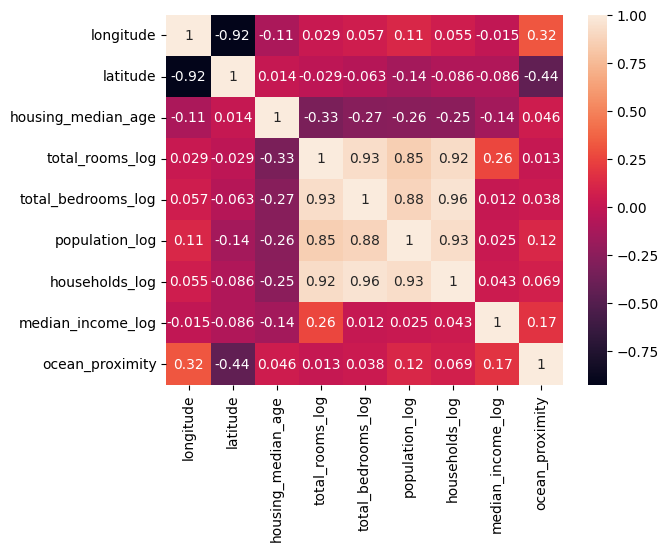

In [644]:
sns.heatmap(X_train.corr(),annot=True)

In [646]:
corr=X_train.corr()

In [647]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(df,threshold):
    col_corr=set()
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [651]:
corr_features=correlation(df,0.8)
corr_features

{'households_log', 'latitude', 'population_log', 'total_bedrooms_log'}

In [652]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [653]:
X_train

,longitude,housing_median_age,total_rooms_log,median_income_log,ocean_proximity
8287,-118.15,41.0,8.145840,1.704748,0.0
4382,-118.26,36.0,8.161660,1.577906,1.0
6104,-117.89,35.0,7.277939,1.608117,1.0
11091,-117.89,18.0,8.070281,1.542464,1.0
13440,-117.42,28.0,7.741099,1.500605,0.0
...,...,...,...,...,...
9615,-120.49,11.0,7.451242,1.082991,0.0
17426,-120.46,14.0,6.786717,1.279989,0.0
1518,-122.07,26.0,8.261785,1.692160,0.0
4438,-118.20,41.0,7.499977,1.170064,1.0


In [654]:
X_test

,longitude,housing_median_age,total_rooms_log,median_income_log,ocean_proximity
14330,-117.14,26.0,6.111467,1.609438,0.0
6732,-118.10,44.0,7.465083,2.378731,1.0
10592,-117.78,16.0,8.131825,1.959545,1.0
10348,-117.66,24.0,7.429521,2.062639,1.0
919,-121.96,22.0,8.667680,1.688378,1.0
...,...,...,...,...,...
3302,-122.60,16.0,7.413367,0.906927,0.0
13915,-116.09,13.0,9.153241,1.284012,0.0
1505,-122.03,21.0,8.458080,1.958939,0.0
8080,-118.19,11.0,6.771936,1.729246,0.0


In [655]:
model=RandomForestRegressor()
model.fit(X_train_scaled,Y_train)

RandomForestRegressor()

In [656]:
y_pred=model.predict(X_test_scaled)
y_pred

array([152896.  , 491494.87, 286905.01, ..., 282029.02, 259490.06,
       324244.01])

In [657]:
r2_score(y_pred,Y_test)

0.7588931469457458

In [658]:
model=LinearRegression()
model.fit(X_train_scaled,Y_train)

LinearRegression()

In [660]:
y_pred=model.predict(X_test_scaled)
y_pred

array([242807.72989745, 397619.55755507, 274270.21719566, ...,
       275698.20726395, 281633.4481443 , 276815.16674078])

In [661]:
r2_score(y_pred,Y_test)

0.415015939203654